In [1]:
# essentials
import numpy as np 
import pandas as pd 

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# time series algorithm
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics

# reproducibility
np.random.seed(34)

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

sns.set()

In [2]:
# df=pd.read_csv('C:/Users/pudge/Downloads/EURRUB_200217_220317 (1).txt',sep=';',parse_dates=['<DATE>'])
# df=df.rename(columns={'<DATE>':'DATE','<OPEN>':'OPEN','<HIGH>':'HIGH','<LOW>':'LOW','<CLOSE>':'CLOSE','<VOL>':'VOL','<TIME>':'TIME'})

In [3]:
# df['HOUR']=hour_list

In [4]:
# df['HOUR_COS'] = df['HOUR'].apply(lambda x: math.cos(x * 2 * math.pi / 24))
# df['HOUR_SIN'] =  df['HOUR'].apply(lambda x: math.sin(x * 2 * math.pi / 24))
# df.head()

In [5]:
# df.to_csv('EURUB.csv')

In [6]:
df = pd.read_csv('../input/eurrub/EURUB.csv', )

df.head()

,Unnamed: 0,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,HOUR,HOUR_COS,HOUR_SIN
0,0,2020-02-17,10000,68.8092,68.8890,68.7750,68.8125,73,1,0.965926,0.258819
1,1,2020-02-17,20000,68.7706,68.9820,68.7182,68.7404,172,2,0.866025,0.500000
2,2,2020-02-17,30000,68.8468,68.8774,68.7245,68.7886,114,3,0.707107,0.707107
3,3,2020-02-17,40000,68.7886,68.8540,68.7750,68.8072,116,4,0.500000,0.866025
4,4,2020-02-17,50000,68.8091,68.8550,68.7108,68.7144,514,5,0.258819,0.965926


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13312 entries, 0 to 13311
Data columns (total 11 columns):
Unnamed: 0    13312 non-null int64
DATE          13312 non-null object
TIME          13312 non-null int64
OPEN          13312 non-null float64
HIGH          13312 non-null float64
LOW           13312 non-null float64
CLOSE         13312 non-null float64
VOL           13312 non-null int64
HOUR          13312 non-null int64
HOUR_COS      13312 non-null float64
HOUR_SIN      13312 non-null float64
dtypes: float64(6), int64(4), object(1)
memory usage: 1.1+ MB


In [8]:
df

,Unnamed: 0,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,HOUR,HOUR_COS,HOUR_SIN
0,0,2020-02-17,10000,68.8092,68.8890,68.7750,68.8125,73,1,9.659258e-01,2.588190e-01
1,1,2020-02-17,20000,68.7706,68.9820,68.7182,68.7404,172,2,8.660254e-01,5.000000e-01
2,2,2020-02-17,30000,68.8468,68.8774,68.7245,68.7886,114,3,7.071068e-01,7.071068e-01
3,3,2020-02-17,40000,68.7886,68.8540,68.7750,68.8072,116,4,5.000000e-01,8.660254e-01
4,4,2020-02-17,50000,68.8091,68.8550,68.7108,68.7144,514,5,2.588190e-01,9.659258e-01
5,5,2020-02-17,60000,68.7138,68.8090,68.6711,68.7837,1108,6,6.123234e-17,1.000000e+00
6,6,2020-02-17,70000,68.7830,68.8200,68.6535,68.6643,541,7,-2.588190e-01,9.659258e-01
7,7,2020-02-17,80000,68.6643,68.8070,68.5875,68.6476,1192,8,-5.000000e-01,8.660254e-01
8,8,2020-02-17,90000,68.6480,68.7720,68.5875,68.6875,1243,9,-7.071068e-01,7.071068e-01
9,9,2020-02-17,100000,68.6879,68.7680,68.5782,68.6069,1845,10,-8.660254e-01,5.000000e-01


In [9]:
df_day = df[df['HOUR']==12]

In [10]:
df_day

,Unnamed: 0,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,HOUR,HOUR_COS,HOUR_SIN
11,11,2020-02-17,120000,68.5798,68.6910,68.5224,68.6717,6560,12,-1.0,1.224647e-16
35,35,2020-02-18,120000,69.1413,69.1875,68.9721,69.0699,7113,12,-1.0,1.224647e-16
59,59,2020-02-19,120000,68.6987,68.7970,68.6419,68.7573,6924,12,-1.0,1.224647e-16
83,83,2020-02-20,120000,68.7061,68.9059,68.6464,68.8996,7150,12,-1.0,1.224647e-16
107,107,2020-02-21,120000,69.4257,69.6400,69.3659,69.5110,7496,12,-1.0,1.224647e-16
131,131,2020-02-24,60000,69.5625,69.7208,69.5292,69.5968,2528,12,-1.0,1.224647e-16
155,155,2020-02-25,60000,70.5552,70.6280,70.4166,70.4387,190,12,-1.0,1.224647e-16
179,179,2020-02-26,60000,71.0241,71.0360,70.9129,70.9890,248,12,-1.0,1.224647e-16
203,203,2020-02-27,60000,71.2513,71.4650,71.2050,71.3921,232,12,-1.0,1.224647e-16
227,227,2020-02-28,60000,72.8376,72.8790,72.6775,72.7731,241,12,-1.0,1.224647e-16


In [11]:
from sklearn.model_selection import train_test_split
train_columns = ['DATE','OPEN']
train = df_day[train_columns][:-15]
train = train.rename(columns={'DATE':'ds','OPEN':'y'})


In [12]:
train

,ds,y
11,2020-02-17,68.5798
35,2020-02-18,69.1413
59,2020-02-19,68.6987
83,2020-02-20,68.7061
107,2020-02-21,69.4257
131,2020-02-24,69.5625
155,2020-02-25,70.5552
179,2020-02-26,71.0241
203,2020-02-27,71.2513
227,2020-02-28,72.8376


In [13]:
m = Prophet()
# m.add_seasonality(name='yearly', period=12, fourier_order=5)
m.fit(train)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=12)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-17,69.321293,68.064305,70.648012
1,2020-02-18,69.564356,68.239576,71.018116
2,2020-02-19,69.774282,68.437301,71.105762
3,2020-02-20,70.160473,68.799992,71.552720
4,2020-02-21,70.407351,69.001141,71.774975
5,2020-02-24,71.586733,70.267918,72.821523
6,2020-02-25,71.951072,70.577374,73.266761
7,2020-02-26,72.294180,70.987742,73.566771
8,2020-02-27,72.823415,71.518616,74.120802
9,2020-02-28,73.220894,71.881241,74.431920


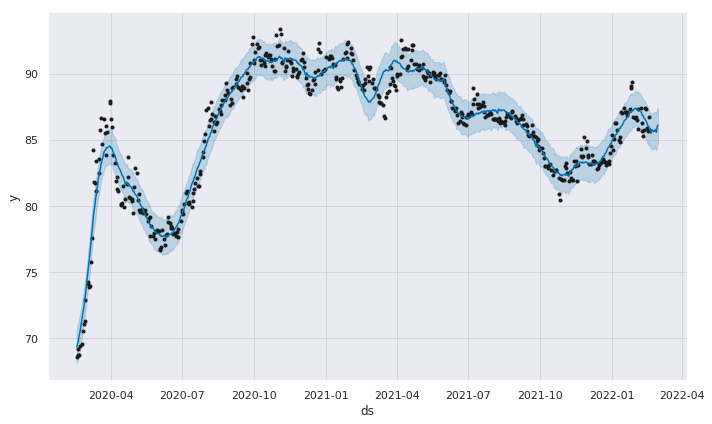

In [15]:
figure = m.plot(forecast)

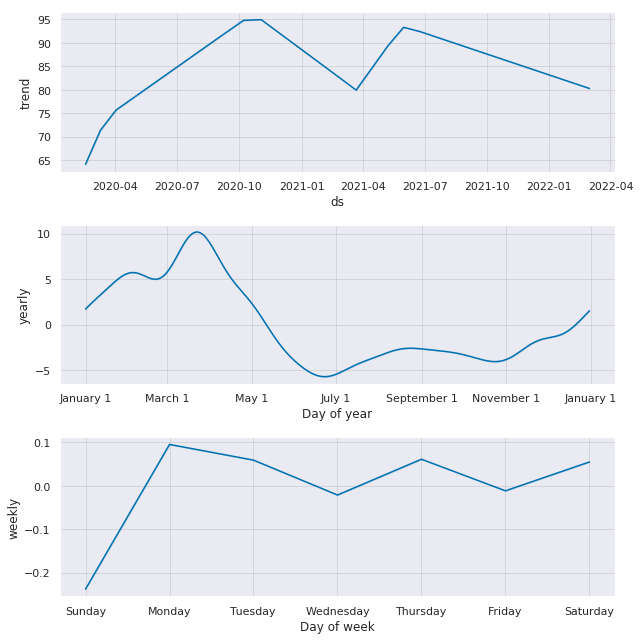

In [16]:
fig_decompose = m.plot_components(forecast)

In [17]:
m2 = Prophet(weekly_seasonality=False, daily_seasonality=False, n_changepoints=2)
m2.add_seasonality(name='yearly', period=12, fourier_order=1)

m2.fit(train)
future2 = m2.make_future_dataframe(periods=12, freq='m')
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Found custom seasonality named "yearly", disabling built-in yearly seasonality.


,ds,yhat,yhat_lower,yhat_upper
547,2022-09-30,84.648253,78.134138,89.887692
548,2022-10-31,84.472958,77.437342,90.667639
549,2022-11-30,84.549346,75.070232,91.571660
550,2022-12-31,84.422409,72.371177,93.055288
551,2023-01-31,84.394300,71.307679,94.104055


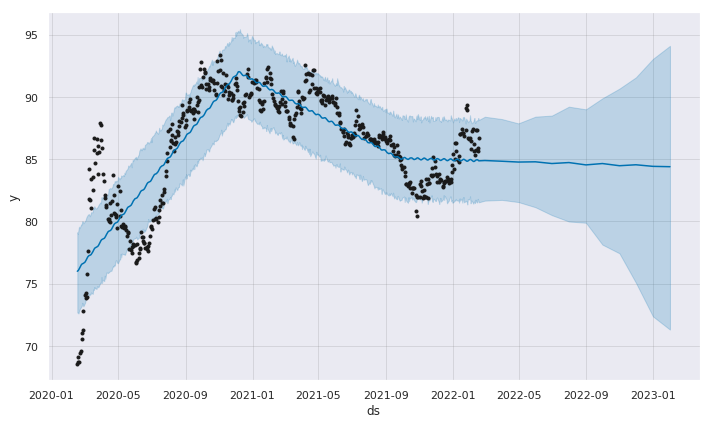

In [18]:
fig2 = m2.plot(forecast2)

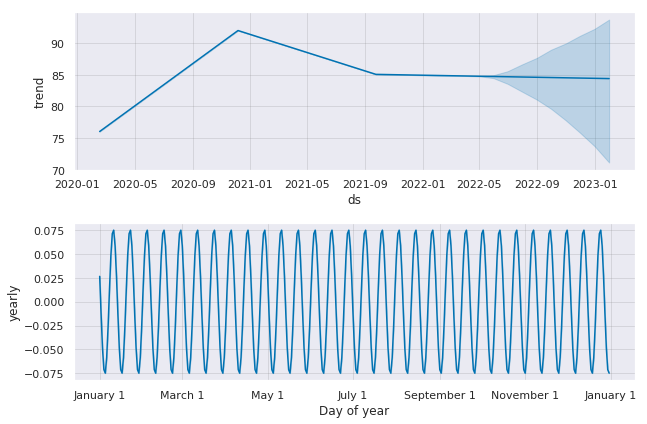

In [19]:
fig2_decompose = m2.plot_components(forecast2)